# XGBoost - Heart Disease (Classification)

[ch6-xgboost-hyperparameters.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch6-xgboost-hyperparameters.ipynb)

In [1]:
!pip install xgboost

You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [5]:
import pandas as pd
#df = pd.read_csv('heart_disease.csv')
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter06/heart_disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Shuffle

In [6]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=2)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 99 to 168
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.groupby('target').sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


### Split feature/target

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Classification Model Selection

In [12]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [13]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

Cross Validation:
Elased time: 0.48s
Accuracy: [0.89 0.8  0.79 0.77 0.77]
Avg. Accuracy: 0.80


In [14]:
cross_validation(XGBClassifier(booster='gblinear'))

Cross Validation:
Elased time: 0.11s
Accuracy: [0.9  0.85 0.77 0.83 0.83]
Avg. Accuracy: 0.84


In [15]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

Cross Validation:
Elased time: 2.59s
Accuracy: [0.85 0.8  0.75 0.78 0.78]
Avg. Accuracy: 0.80


In [16]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 0.28s
Accuracy: [0.9  0.84 0.79 0.77 0.83]
Avg. Accuracy: 0.82


## HPO

### Default

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Utility function to estimate accuracy scores
def model_estimation(model):    
    start = time.time()
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))
    print('Elapsed time: %0.2fs' % (time.time()-start)) 
    
    return accuracy_score(y_test,y_pred)

In [18]:
# default model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

best_score = model_estimation(model)
best_model = model

print('\nbest_score: %0.3f' % (best_score))


Confusion Matrix:
[[26  7]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

Accuracy Score: 0.84
Precision Score: 0.84
Recall Score: 0.88
F1 Score: 0.86
Elapsed time: 0.00s

best_score: 0.842


In [19]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    print("best parameter:", rand_clf.best_params_)    
    print("best score: {:.3f}".format(rand_clf.best_score_))

    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [21]:
import time
start = time.time()

randomized_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 0.7, 1, 2],
        'min_child_weight':[5, 10, 15, 20, 30],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.2, 0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}
best score: 0.850
Model with rank: 1
Mean validation score: 0.850 (std: 0.010)
Parameters: {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.824 (std: 0.023)
Parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.7, 'colsample_bytree': 1}

Model with rank: 3
Mean validation score: 0.815 (std: 0.045)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.8, 'gamma': 0.01, 'colsample_bytree': 0.5}

Model with rank: 4
Mean validation score: 0.806 (std: 0.017)
Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0.5, '

In [22]:
score = model_estimation(randomized_model)
print('\nscore: %0.3f' % (score))  

if(score > best_score):
    best_score = score
    best_model = model

    print('best_score: %0.3f' % (best_score))  


Confusion Matrix:
[[28  5]
 [ 6 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.88      0.86      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

Accuracy Score: 0.86
Precision Score: 0.88
Recall Score: 0.86
F1 Score: 0.87
Elapsed time: 0.01s

score: 0.855
best_score: 0.855


## HPO: Bayesian Optimization 

In [23]:
from bayes_opt import BayesianOptimization

def xgbc_cv(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, ):
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(n_estimators),
                        learning_rate=learning_rate,
                        max_depth=int(max_depth),
                        gamma=gamma,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

    xgb.fit(X_train, y_train)    

    y_pred = xgb.predict(X_test)

    score = accuracy_score(y_pred, y_test)

    print('score=', score)

    return score

hyperparameter_space = {
    'n_estimators': (50, 800),
    'learning_rate': (0.01, 1.0),
    'max_depth': (1, 8),
    'gamma' : (0.01, 1),
    'min_child_weight': (1, 20),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

optimizer = BayesianOptimization(f=xgbc_cv, pbounds=hyperparameter_space, random_state=2, verbose=0)

#gp_params = {"alpha": 1e-10}
#optimizer.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)    

#optimizer.maximize(init_points=2, n_iter=10)
optimizer.maximize(init_points=3, n_iter=5, acq='ei')


optimizer.max

score= 0.8552631578947368
score= 0.8552631578947368
score= 0.868421052631579
score= 0.8157894736842105
score= 0.8157894736842105
score= 0.868421052631579
score= 0.868421052631579
score= 0.868421052631579


{'target': 0.868421052631579,
 'params': {'colsample_bytree': 0.2659958790822238,
  'gamma': 0.7874817963385067,
  'learning_rate': 0.8554355397130939,
  'max_depth': 4.459657861673495,
  'min_child_weight': 17.08466822179189,
  'n_estimators': 109.73410775679574,
  'subsample': 0.752623045060852}}

In [24]:
best_params = optimizer.max['params']

In [25]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(best_params['n_estimators']), 
                        learning_rate=best_params['learning_rate'], 
                        max_depth=int(best_params['max_depth']), 
                        gamma=best_params['gamma'], 
                        min_child_weight=int(best_params['min_child_weight']), 
                        subsample=best_params['subsample'], 
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('score=', score)     

if(score > best_score): 
    best_score = score
    best_model = model
    
    best_score = model_estimation(model)
    print('\nbest_score: %0.3f' % (best_score))
                     

score= 0.868421052631579

Confusion Matrix:
[[28  5]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.88      0.88      0.88        43

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

Accuracy Score: 0.87
Precision Score: 0.88
Recall Score: 0.88
F1 Score: 0.88
Elapsed time: 0.00s

best_score: 0.868


## Evaluation

In [26]:
cross_validation(best_model)   
model_estimation(best_model)    

Cross Validation:
Elased time: 0.18s
Accuracy: [0.85 0.64 0.74 0.57 0.75]
Avg. Accuracy: 0.71

Confusion Matrix:
[[28  5]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.88      0.88      0.88        43

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

Accuracy Score: 0.87
Precision Score: 0.88
Recall Score: 0.88
F1 Score: 0.88
Elapsed time: 0.00s


0.868421052631579

In [27]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.2659958790822238,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.7874817963385067,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.8554355397130939,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 4,
 'max_leaves': 0,
 'min_child_weight': 17,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 109,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.752623045060852,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Feature Importances

Feature Importances:
[0.         0.         0.6579091  0.         0.08289965 0.
 0.         0.         0.         0.         0.         0.2591913
 0.        ]
You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


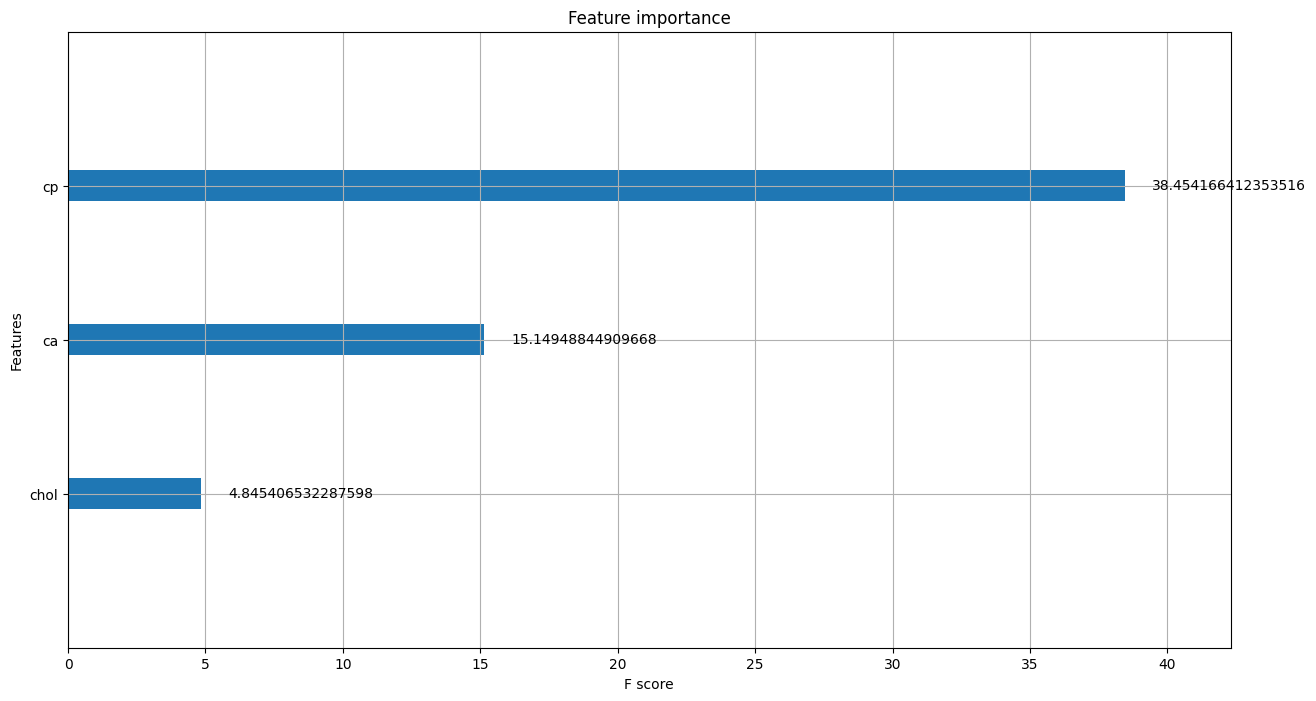

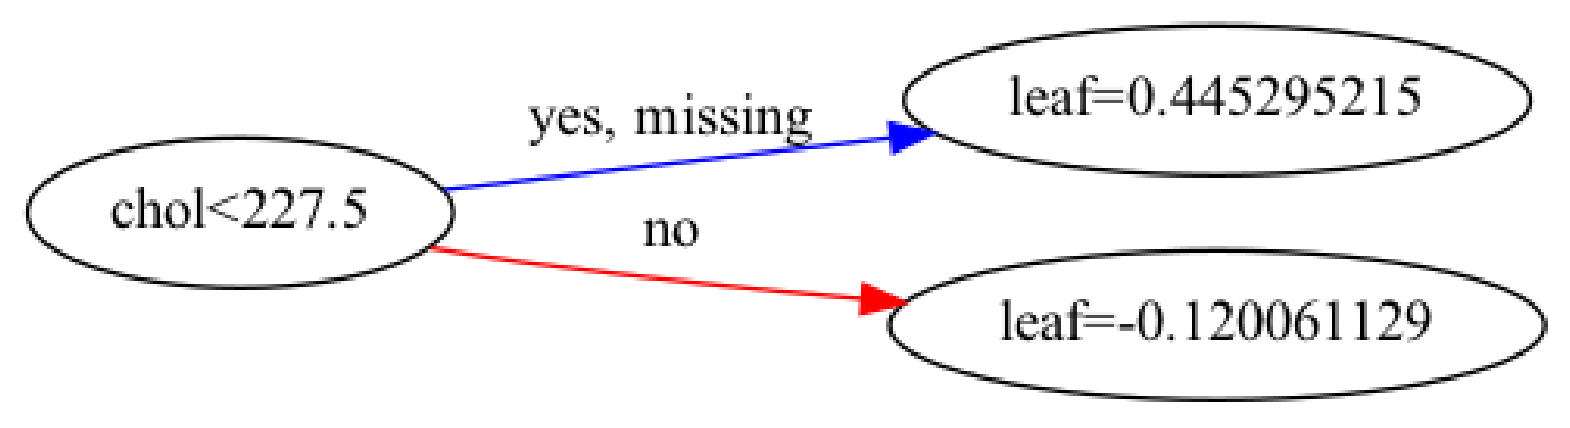

In [28]:
print('Feature Importances:')
print(best_model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
best_model.get_booster().feature_names = feature_data.feature_names
best_model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(best_model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(best_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()